<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Import</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Merging-tables" data-toc-modified-id="Merging-tables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Merging tables</a></span></li><li><span><a href="#Feature-Engineering-for-holidays" data-toc-modified-id="Feature-Engineering-for-holidays-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature Engineering for holidays</a></span><ul class="toc-item"><li><span><a href="#Create-isholiday-column-based-on-holidays_events-information" data-toc-modified-id="Create-isholiday-column-based-on-holidays_events-information-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Create isholiday column based on holidays_events information</a></span></li><li><span><a href="#Create-a-column-for-paychecks" data-toc-modified-id="Create-a-column-for-paychecks-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Create a column for paychecks</a></span></li><li><span><a href="#Create-earthquake-column" data-toc-modified-id="Create-earthquake-column-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Create earthquake column</a></span></li></ul></li><li><span><a href="#Handling-with-missing-values" data-toc-modified-id="Handling-with-missing-values-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Handling with missing values</a></span><ul class="toc-item"><li><span><a href="#Drop-columns-which-are-not-useful" data-toc-modified-id="Drop-columns-which-are-not-useful-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Drop columns which are not useful</a></span></li><li><span><a href="#Handling-with-dcoilwtico-missing-values" data-toc-modified-id="Handling-with-dcoilwtico-missing-values-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Handling with dcoilwtico missing values</a></span></li></ul></li></ul></li></ul></div>

# Store Time Series Forcasting

### Introduction

In this notebook, I will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. You can find the dataset in [Kaggle](https://www.kaggle.com/c/store-sales-time-series-forecasting/data). Kaggle provides 5 datasets for training: holidays_events, oil, stores, train, transactions, and test dataset. 

### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
from pathlib import Path

import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/Store_Time_Series_Forecasting'

In [3]:
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/Store_Time_Series_Forecasting/Data')

## Data Cleaning

### Load the Data

There are 6 files associated with this project:

- train.csv: The training data, comprising time series of features __store_nbr, family__, and __onpromotion__ as well as the target __sales.__ 
    - __store_nbr__ identifies the store at which the products are sold
    - __family__ identifies the type of product sold
    - __sales__ give the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips). 
    - __onpromotion__ gives the total number of items in a product family that were being promoted at a store at a given date. 
    
    
- test.csv: The test data, having the same features as the training data. We need to predict the target __sales__ for the dates in this file. __The dates__ in the test data are for the 15 days after the last date in the training data. 

- stores.csv: Store metadata, including __city, state, type__, and __cluster__ which is a grouping of similar stores. 

- oil.csv: Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices). 

- holidays_events.csv: Holidays and Events, with metadata
    - Pay special attention to the __transferred__ column. A holiday that is transferred officially falls on that calendar day, but was moved to anohter date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the correponding row where type is __Transfer__. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type __Bridge__ are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type __Work Day__ which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback __the Bridge__. 
    - __Additional__ holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday). 
    
    
- Additional Notes:
    - Wages in the public sector are paid every two weeks on the 15th and on the last day of the month. Supermarket sales could be affected by this. 
    - A magnitude 7.8 earthquake struck Ecuador on April 16, 2016 (2016-04-16). People rallied in relief efforts donating water and other first need products which greatly affected supermarker sales for several weeks after the earthquake. 

In [4]:
file_names = ['holidays_events', 'oil', 'stores', 'train', 'transactions', 'test', 'sample_submission']
table = [pd.read_csv(path/f'{fname}.csv') for fname in file_names]
holidays, oil, stores, train, transactions, test, s_submission = table

In [5]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0.00000
1,1,2013-01-01,1,BABY CARE,0.00000,0.00000
2,2,2013-01-01,1,BEAUTY,0.00000,0.00000
3,3,2013-01-01,1,BEVERAGES,0.00000,0.00000
4,4,2013-01-01,1,BOOKS,0.00000,0.00000


In [6]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.00000
1,3000889,2017-08-16,1,BABY CARE,1.00000
2,3000890,2017-08-16,1,BEAUTY,8.00000
3,3000891,2017-08-16,1,BEVERAGES,560.00000
4,3000892,2017-08-16,1,BOOKS,1.00000


In [7]:
train.shape, test.shape

((3000888, 6), (28512, 5))

In [8]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3000888.00000,3000888.00000,3000888.00000,3000888.00000
mean,1500443.50000,27.50000,357.77575,34.60289
std,866281.89164,15.58579,1101.99772,99.48216
min,0.00000,1.00000,0.00000,0.00000
25%,750221.75000,14.00000,0.00000,0.00000
50%,1500443.50000,27.50000,11.00000,1.00000
75%,2250665.25000,41.00000,195.84725,16.00000
max,3000887.00000,54.00000,124717.00000,1006.00000


In [9]:
test.describe()

,id,store_nbr,onpromotion
count,28512.00000,28512.00000,28512.00000
mean,3015143.50000,27.50000,118.21212
std,8230.84977,15.58606,240.27297
min,3000888.00000,1.00000,1.00000
25%,3008015.75000,14.00000,14.00000
50%,3015143.50000,27.50000,29.00000
75%,3022271.25000,41.00000,90.00000
max,3029399.00000,54.00000,1277.00000


__Observations:__
   - Test dataset shows larger mean and std of onpromotion than train dataset. 

In [10]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [11]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


holidays and stores have the same name of column (__type__), so I would like to change the column name in holidays.

In [12]:
holidays.rename(columns={'type': 'holiday_type'}, inplace=True)

In [13]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14000
2,2013-01-03,92.97000
3,2013-01-04,93.12000
4,2013-01-07,93.20000


In [14]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### Merging tables 

In [15]:
train = train.merge(transactions, how='left', on=['date', 'store_nbr'])
test = test.merge(transactions, how='left', on=['date', 'store_nbr'])

In [16]:
train = train.merge(holidays, how='left', on='date')
test = test.merge(holidays, how='left', on='date')

In [17]:
train = train.merge(oil, how='left', on='date')
test = test.merge(oil, how='left', on='date')

In [18]:
train = train.merge(stores, how='left', on='store_nbr')
test = test.merge(stores, how='left', on='store_nbr')

In [19]:
train.shape, test.shape

((3054348, 17), (28512, 16))

In [20]:
train.describe()

,id,store_nbr,sales,onpromotion,transactions,dcoilwtico,cluster
count,3054348.00000,3054348.00000,3054348.00000,3054348.00000,2805231.00000,2099196.00000,3054348.00000
mean,1504276.77538,27.50000,359.02089,34.73166,1697.07144,68.01587,8.48148
std,866261.01201,15.58579,1107.28590,99.68402,966.83165,25.69134,4.64973
min,0.00000,1.00000,0.00000,0.00000,5.00000,26.19000,1.00000
25%,754676.75000,14.00000,0.00000,0.00000,1046.00000,46.41000,4.00000
50%,1507571.50000,27.50000,11.00000,1.00000,1395.00000,53.43000,8.50000
75%,2255120.25000,41.00000,196.01100,16.00000,2081.00000,95.81000,13.00000
max,3000887.00000,54.00000,124717.00000,1006.00000,8359.00000,110.62000,17.00000


In [21]:
test.describe()

,id,store_nbr,onpromotion,transactions,dcoilwtico,cluster
count,28512.00000,28512.00000,28512.00000,0.00000,21384.00000,28512.00000
mean,3015143.50000,27.50000,118.21212,NaN,47.24333,8.48148
std,8230.84977,15.58606,240.27297,NaN,0.75392,4.64982
min,3000888.00000,1.00000,1.00000,NaN,45.96000,1.00000
25%,3008015.75000,14.00000,14.00000,NaN,46.71500,4.00000
50%,3015143.50000,27.50000,29.00000,NaN,47.25000,8.50000
75%,3022271.25000,41.00000,90.00000,NaN,47.65000,13.00000
max,3029399.00000,54.00000,1277.00000,NaN,48.59000,17.00000


__Observations:__
   - It seems like train and test dataset has different statistics in onpromotion and dcoilwtico, so I will create some graphs to take a look at them. 

### Feature Engineering for holidays

Given the data description, we have to perform feature engineering for __holidays_events__ information and __paycheck__ days and __Earthquake__ (Natural disaster). 

- holidays_events.csv: need to see __transferred__ column
    - Pay special attention to the __transferred__ column. A holiday that is transferred officially falls on that calendar day, but was moved to anohter date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the correponding row where type is __Transfer__. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type __Bridge__ are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type __Work Day__ which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge. 
    - __Additional__ holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday). 
    
    
- 15th and the last day of month: are paycheck days


- 2016-04-16: Earthquake (several weeks affected because people wanted to donate water or other first need products)




#### Create isholiday column based on holidays_events information

I am going to create new variable called `__isholiday__` which indicate whether holidays (1) or not (0). In order to do this, I will go through the following steps:
   - 1) fill NaN values in __holiday_type__ with __Weekday__
   - 2) Indicating 1 for Holidays in the new column of __isholiday__, based on __holiday_type__ information: Event, Additional, Transfer, Bridge, and Holiday but not __transferred__ True. 
   - 3) Indicating 0 for Non holidays in the new column of __isholiday__: Weekday, Work Day and Holiday but __transferred__ is True.
   - 4) The same conditions will apply to test.csv

In [22]:
train.head(2)

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0.00000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.00000,0.00000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13


In [23]:
# 1) fill NaN values in holiday_type with Weekday
train['holiday_type'] = train['holiday_type'].fillna('Weekday')
test['holiday_type'] = test['holiday_type'].fillna('Weekday')

In [24]:
# Create function for isholiday column
def holiday_id(df):
    if df['holiday_type'] == 'Event': return 1
    elif df['holiday_type'] == 'Additional': return 1
    elif df['holiday_type'] == 'Bridge': return 1
    elif df['holiday_type'] == 'Transfer': return 1
    elif (df['holiday_type'] == 'Holiday') & (df['transferred']==False): return 1
    elif (df['holiday_type'] == 'Holiday') & (df['transferred']==True): return 0
    elif df['holiday_type'] == 'Weekday': return 0
    elif df['holiday_type'] == 'Work Day': return 0

# Apply the condition to new column in train and test set
train['isholiday'] = train.apply(holiday_id, axis=1)
test['isholiday'] = test.apply(holiday_id, axis=1)

In [25]:
# drop holiday_type and transferred columns from training and test dataset
train.drop(['holiday_type', 'transferred'], axis=1, inplace=True)
test.drop(['holiday_type', 'transferred'], axis=1, inplace=True)

#### Create a column for paychecks

- 15th and the last day of month: are paycheck days
    - 1) change dtype of date to datetime64
    - 2) extract 'year', 'month', 'day' information from date column
    - 3) create new column of 31th which indicates whether the last day of the month is 31th or not
    - 4) create new column of 2016_feb which indicates whether the last day of february is 29th or not
    - 5) create new column of paychecks if it is 15th and last day of month based on the conditions that I make above
    - 6) fill NaN values in paychecks with 0
    - 7) apply to test.csv with the same condition


In [26]:
# change dtype of date to datetime64
train['date'] = train['date'].astype('datetime64')
test['date'] = test['date'].astype('datetime64')

In [27]:
# create columns for year, month, day based on date column
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

In [28]:
train.head(2)

,id,date,store_nbr,family,sales,onpromotion,transactions,locale,locale_name,description,dcoilwtico,city,state,type,cluster,isholiday,year,month,day
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0.00000,NaN,National,Ecuador,Primer dia del ano,NaN,Quito,Pichincha,D,13,1,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.00000,0.00000,NaN,National,Ecuador,Primer dia del ano,NaN,Quito,Pichincha,D,13,1,2013,1,1


In [29]:
## create new column for paychecks if it is 15th and last day of month

# 1) create a new column for 31th which indicates whether the month has 31th day or not
train.loc[train['month'].isin([4, 6, 9, 11]), '31th'] = 0
train.loc[train['month'].isin([1, 3, 5, 7, 8, 10, 12]), '31th'] = 1
train.loc[train['month'].isin([2]), '31th'] = 2


# 2) create a new column for 2016_feb which indicates whether 2016 year or not
# because 2016's Feb has 29th, so the last day of the month is 29th not 28th
train.loc[train['year'].isin([2016]), '2016_feb'] = 1
train.loc[train['year'].isin([2013, 2014, 2015, 2017]), '2016_feb'] = 0

# 3) create function to make paycheck column
def day_id(df):
    if (df['2016_feb']==1) & (df['day']==29): return 1
    elif (df['2016_feb']==0) & (df['day']==28): return 1
    elif (df['31th'] == 0) & (df['day']==30): return 1
    elif (df['31th']==1) & (df['day']==31): return 1
    elif (df['day']==15): return 1

# 4) apply to train['paycheck']
train['paycheck'] = train.apply(day_id, axis=1)

# fill NaN with 0
train['paycheck'] = train['paycheck'].fillna(0)

In [30]:
train.tail(2)

,id,date,store_nbr,family,sales,onpromotion,transactions,locale,locale_name,description,dcoilwtico,city,state,type,cluster,isholiday,year,month,day,31th,2016_feb,paycheck
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.00000,10.00000,2155.00000,Local,Riobamba,Fundacion de Riobamba,47.57000,Quito,Pichincha,B,6,1,2017,8,15,1.00000,0.00000,1.00000
3054347,3000887,2017-08-15,9,SEAFOOD,16.00000,2.00000,2155.00000,Local,Riobamba,Fundacion de Riobamba,47.57000,Quito,Pichincha,B,6,1,2017,8,15,1.00000,0.00000,1.00000


In [31]:
# create a column of paycheck for test.csv
# the code is more simple because test.csv has only data from 2017-08-16 to 2017-08-31

def day_id_test(df):
    if df['day']==31: 
        return 1
    else: 
        return 0
    
test['paycheck'] = test.apply(day_id_test, axis=1)
test['paycheck'] = test['paycheck'].fillna(0)

In [32]:
test.tail(2)

,id,date,store_nbr,family,onpromotion,transactions,locale,locale_name,description,dcoilwtico,city,state,type,cluster,isholiday,year,month,day,paycheck
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,15.00000,NaN,NaN,NaN,NaN,47.26000,Quito,Pichincha,B,6,0,2017,8,31,1
28511,3029399,2017-08-31,9,SEAFOOD,8.00000,NaN,NaN,NaN,NaN,47.26000,Quito,Pichincha,B,6,0,2017,8,31,1


#### Create earthquake column

2016-04-16: Earthquake (several weeks affected because people wanted to donate water or other first need products)

In [33]:
# create new column for earthquake for training and test dataset
def earthquake_id(df):
    if (df['year'] == 2016) & (df['month']==4) & (df['day']==16): 
        return 1
    else: 
        return 0

train['earthquake'] = train.apply(earthquake_id, axis=1)
test['earthquake'] = test.apply(earthquake_id, axis=1)

### Handling with missing values

We have some missing values in several columns. If I need to keep columns which have missing values, then I will impute NaN values with median for numeric variables, with mode for categorical variables. I also need to decide which columns I need to remove (drop) for further analysis. 

For non-holiday days, they don't have any information about holiday_type, transferred, locale, locale_name and description. So I will impute those missing values in training and test dataset as follows:

- We have a lot of missing values in __holiday_type__. But we can fill NaN in holiday_type with "__weekday__". 
- __transferred__ column has missing values and we can fill NaN with "__weekday__"
- __locale and locale_name and description__ columns has missing values and we can fill NaN with "__unknown__"

Lastly, for oil information, we have some missing values in __dcoilwtico__. I would like to fill NaN by using stacked information. 

#### Drop columns which are not useful

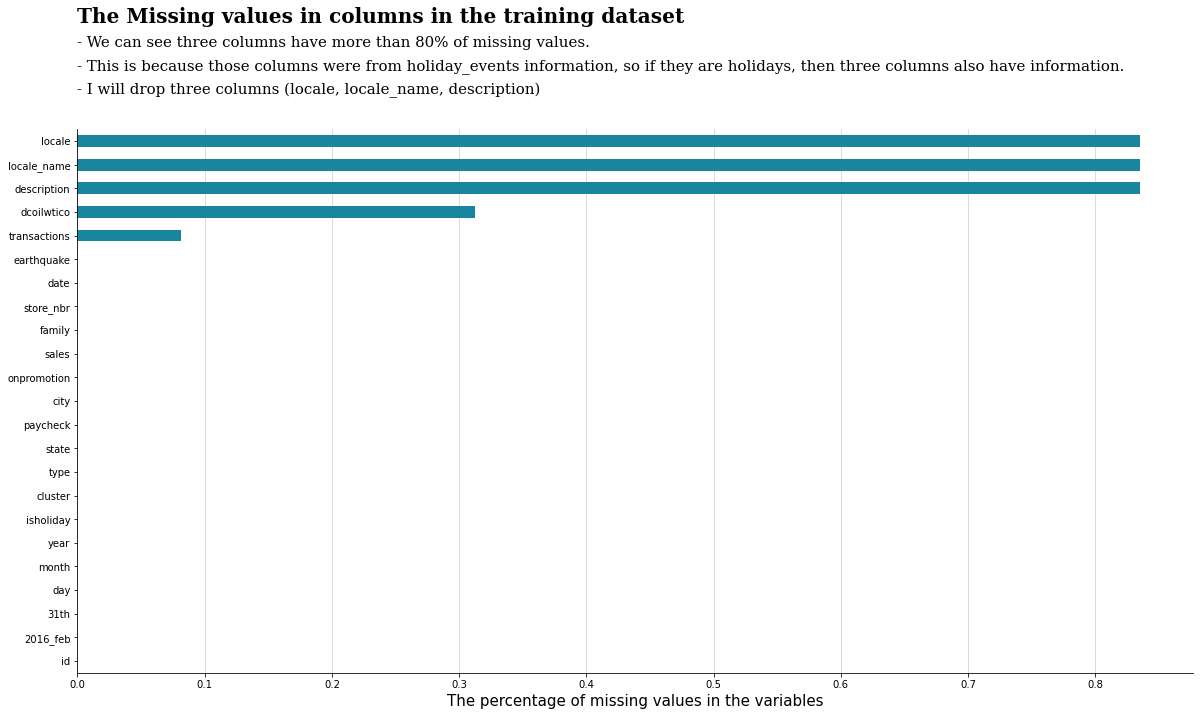

In [34]:
missing_train = (train.isnull().sum()/len(train)).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(20, 10))
missing_train.plot(kind='barh', color='#17869E')
plt.xlabel('The percentage of missing values in the variables', fontsize=15);

# Observation
plt.text(0, 27, "The Missing values in columns in the training dataset", 
        fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(0, 26, "- We can see three columns have more than 80% of missing values.",
        fontsize=15, fontweight='light', fontfamily='serif')
plt.text(0, 25, "- This is because those columns were from holiday_events information, so if they are holidays, then three columns also have information.",
        fontsize=15, fontweight='light', fontfamily='serif')
plt.text(0, 24, "- I will drop three columns (locale, locale_name, description)",
        fontsize=15, fontweight='light', fontfamily='serif');


# Ax spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.set_axisbelow(True)
ax.xaxis.grid(color='lightgray', linestyle='-');

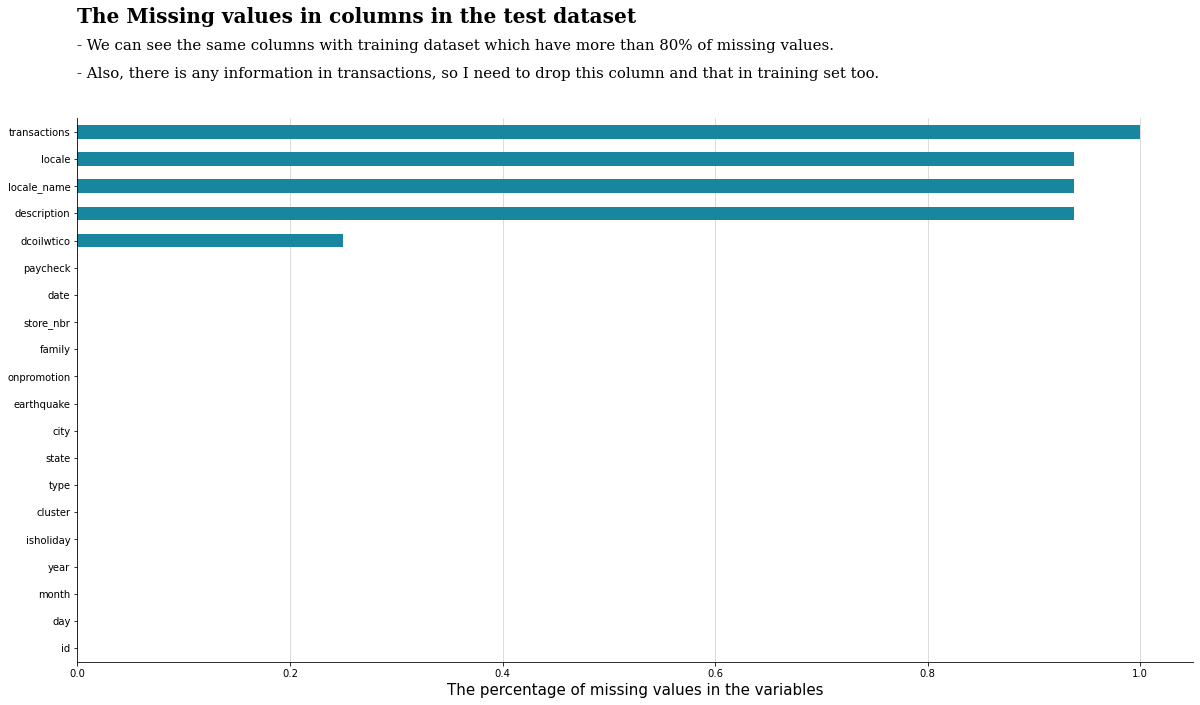

In [35]:
missing_test = (test.isnull().sum()/len(test)).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(20, 10))
missing_test.plot(kind='barh', color='#17869E')
plt.xlabel('The percentage of missing values in the variables', fontsize=15);

# Observation
plt.text(0, 23, "The Missing values in columns in the test dataset", 
        fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(0, 22, "- We can see the same columns with training dataset which have more than 80% of missing values.",
        fontsize=15, fontweight='light', fontfamily='serif')
plt.text(0, 21, "- Also, there is any information in transactions, so I need to drop this column and that in training set too.",
        fontsize=15, fontweight='light', fontfamily='serif');


# Ax spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.set_axisbelow(True)
ax.xaxis.grid(color='lightgray', linestyle='-');

In [36]:
# drop columns that I don't need 
drop_cols = ['transactions', 'locale', 'locale_name', 'description']
train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)

In [38]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,isholiday,year,month,day,31th,2016_feb,paycheck,earthquake
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0.00000,NaN,Quito,Pichincha,D,13,1,2013,1,1,1.00000,0.00000,0.00000,0
1,1,2013-01-01,1,BABY CARE,0.00000,0.00000,NaN,Quito,Pichincha,D,13,1,2013,1,1,1.00000,0.00000,0.00000,0
2,2,2013-01-01,1,BEAUTY,0.00000,0.00000,NaN,Quito,Pichincha,D,13,1,2013,1,1,1.00000,0.00000,0.00000,0
3,3,2013-01-01,1,BEVERAGES,0.00000,0.00000,NaN,Quito,Pichincha,D,13,1,2013,1,1,1.00000,0.00000,0.00000,0
4,4,2013-01-01,1,BOOKS,0.00000,0.00000,NaN,Quito,Pichincha,D,13,1,2013,1,1,1.00000,0.00000,0.00000,0


#### Handling with dcoilwtico missing values

for oil information, we have some missing values in __dcoilwtico__. I would like to fill NaN by using stacked information. 

<AxesSubplot:>

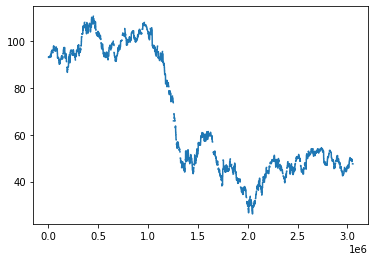

In [42]:
train['dcoilwtico'].plot()

<AxesSubplot:>

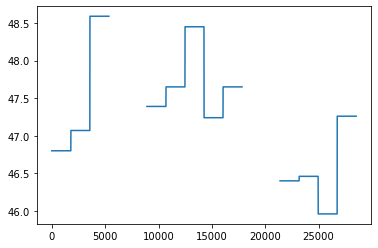

In [43]:
test['dcoilwtico'].plot()